<a href="https://colab.research.google.com/github/yongghongg/stock-screener/blob/main/stock_breakout_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


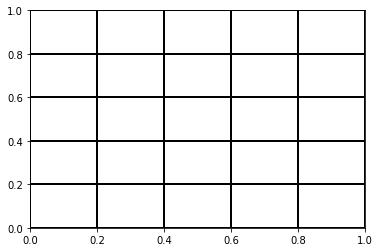

In [185]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# !pip install yfinance
# !pip install mplfinance
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [176]:
# load_data('ROKU')
df = pd.read_csv("../data/ROKU.csv", header=[0])
df
df[df.Date > '2018-01-01'][df.Date < '2021-01-01']
# df = yf.download('GOOGL', start='2021-02-01', threads= False)
# df.to_csv('goog.csv')
# pd.read_csv('goog.csv')

/var/folders/7t/9_rxzgb937zf_5_x86w4x90h0000gn/T/ipykernel_31763/4129262207.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Date > '2018-01-01'][df.Date < '2021-01-01']


,Date,Open,High,Low,Close,Adj Close,Volume
65,2018-01-02,52.639999,52.849998,50.349998,52.070000,52.070000,4226700
66,2018-01-03,52.799999,57.416000,52.720001,55.439999,55.439999,9911800
67,2018-01-04,51.560001,52.775002,50.209999,51.240002,51.240002,9392600
68,2018-01-05,48.060001,48.990002,46.130001,46.279999,46.279999,13007900
69,2018-01-08,45.139999,48.360001,42.790001,47.470001,47.470001,12031400
...,...,...,...,...,...,...,...
816,2020-12-24,360.171997,363.440002,355.130005,356.989990,356.989990,1846100
817,2020-12-28,359.500000,361.000000,339.119995,340.410004,340.410004,4726500
818,2020-12-29,339.959991,344.940002,332.049988,339.570007,339.570007,3639100
819,2020-12-30,339.166992,344.440002,333.500000,338.739990,338.739990,3215300


downloading /Users/bijan/code/hu/src/../data/COST.csv
[*********************100%***********************]  1 of 1 completed


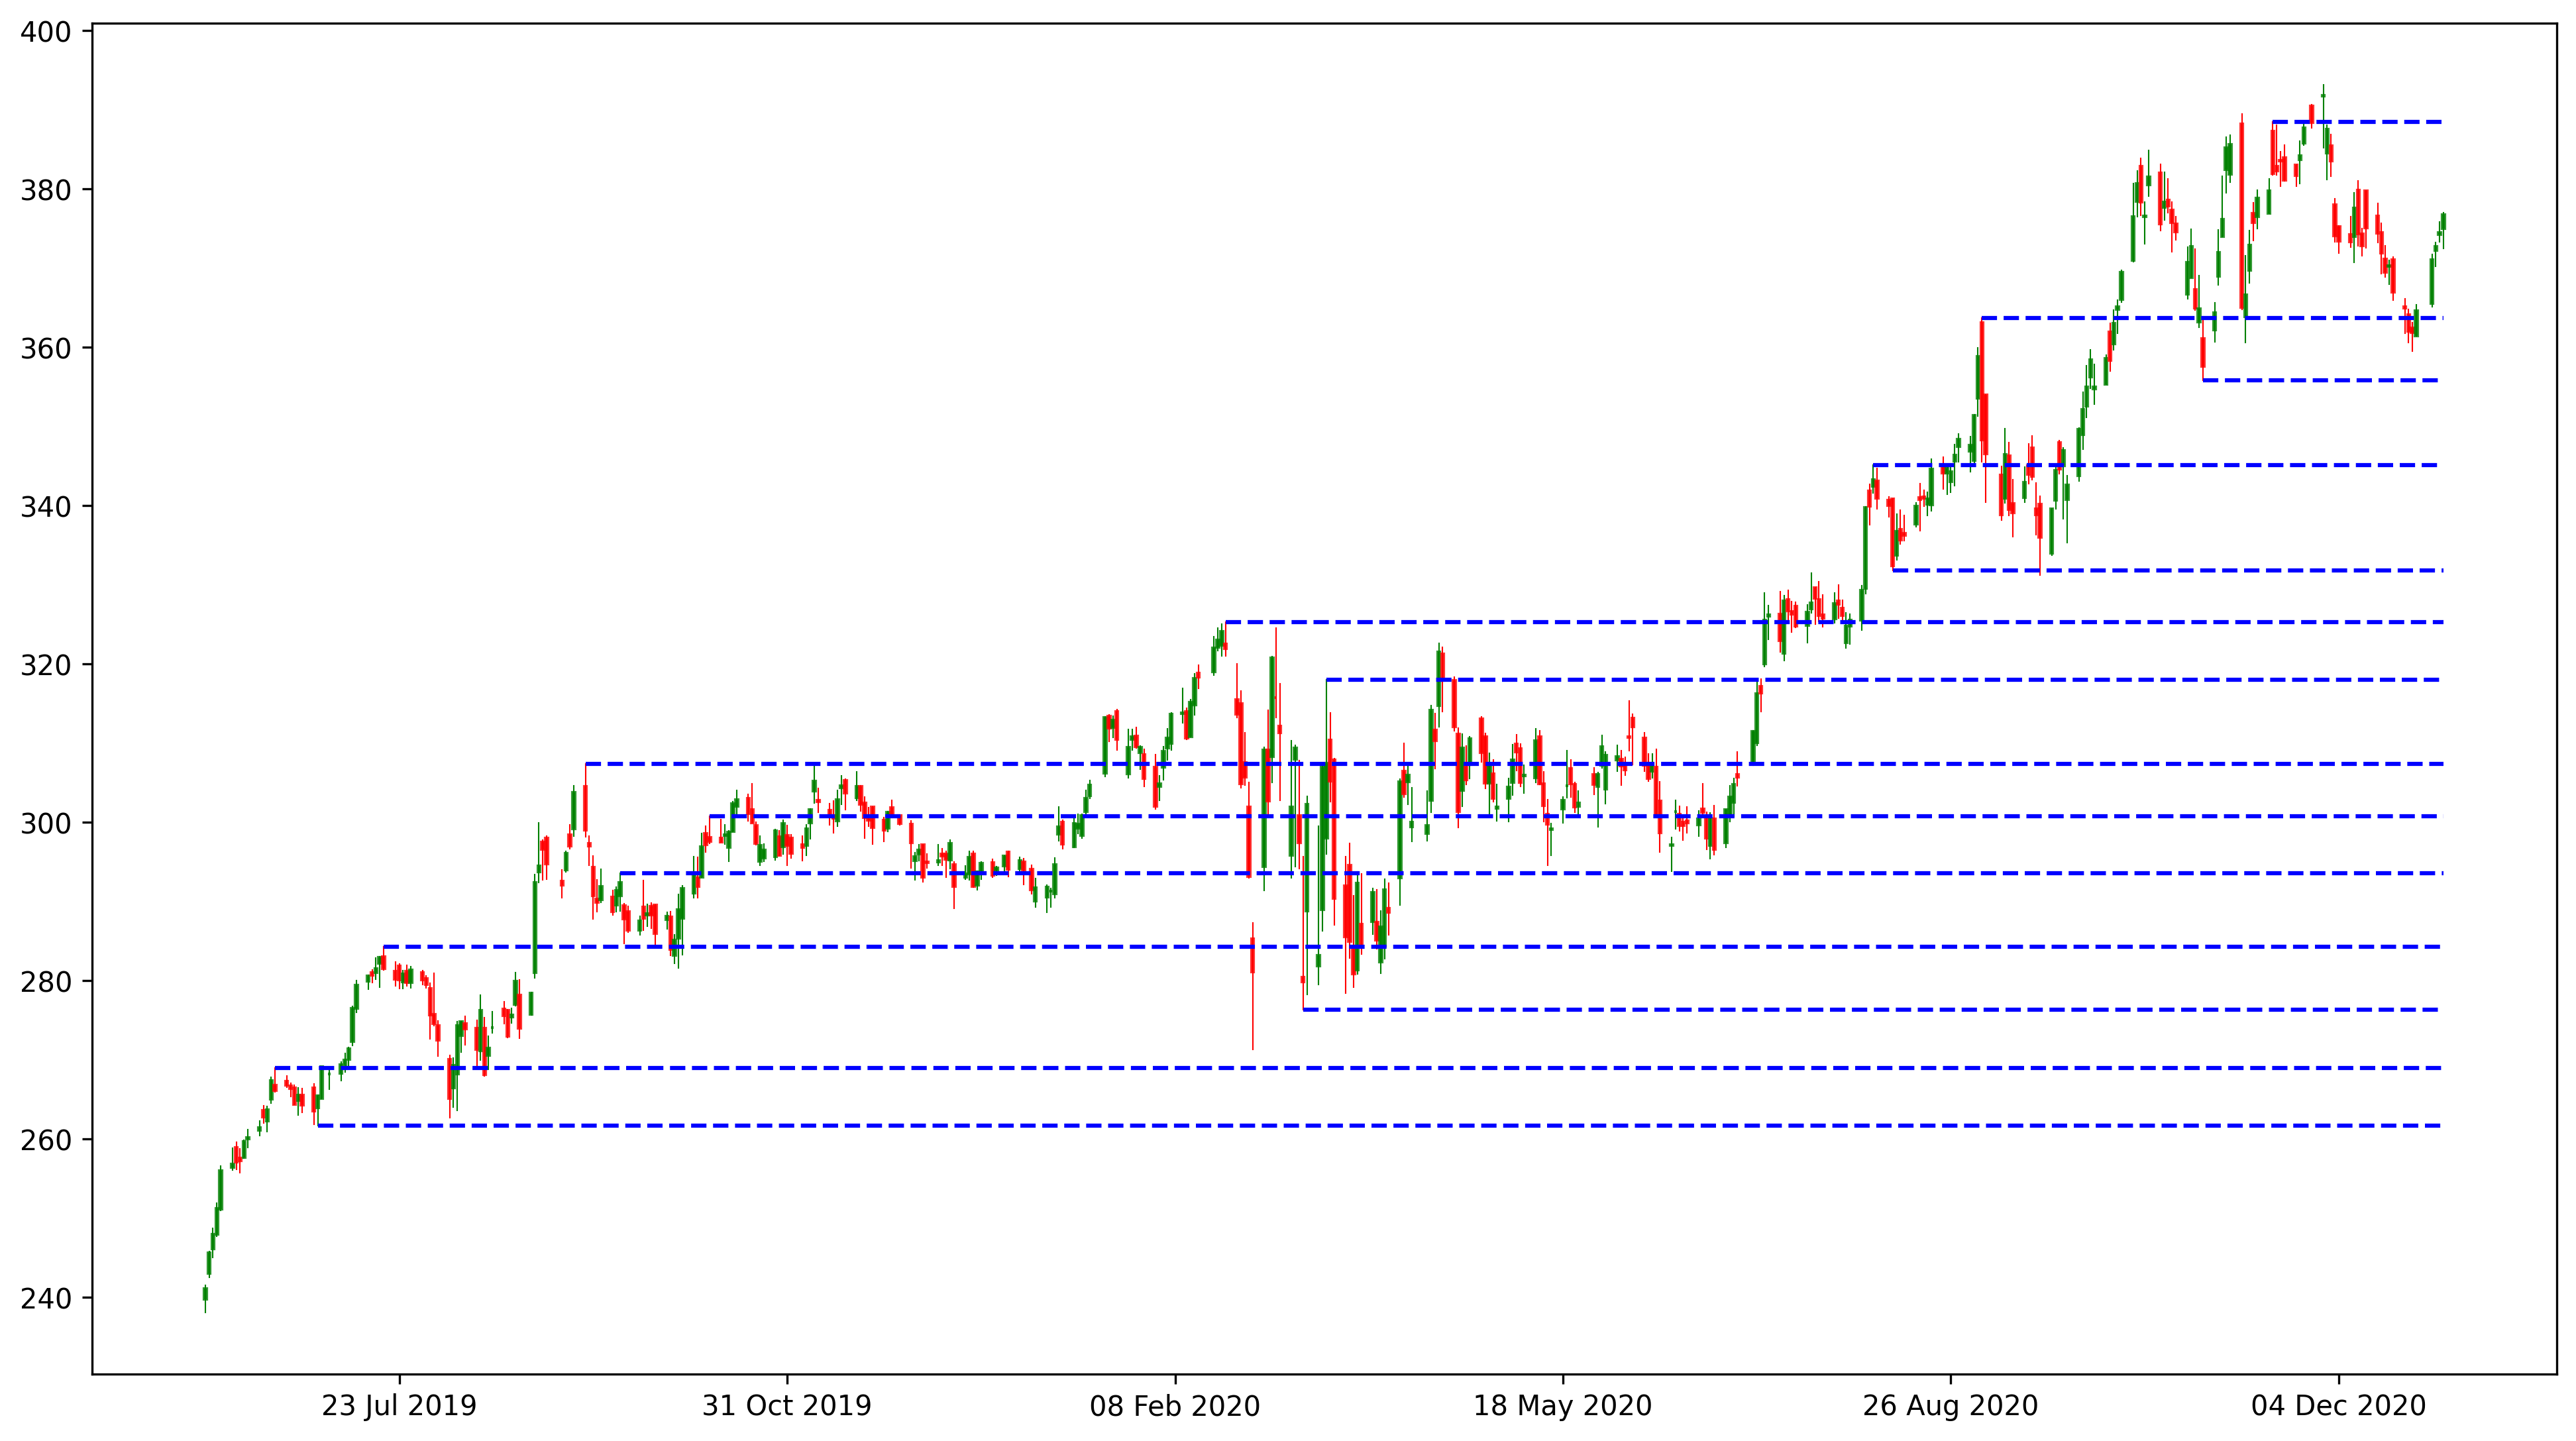

In [187]:
# method 1: fractal candlestick pattern
def get_stock_price(symbol):
#   df = yf.download(symbol, start='2021-02-01', threads= False)
  df = load_data(symbol)
#   df = df[df.Date > '2018-01-01'][df.Date < '2021-01-01'].copy()
  df = df[df.Date.between('2019-06-01', '2021-01-01')]
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return df.reset_index(drop=True)

def is_support(df,i):
  cond1 = df['Low'][i] < df['Low'][i-1] 
  cond2 = df['Low'][i] < df['Low'][i+1] 
  cond3 = df['Low'][i+1] < df['Low'][i+2] 
  cond4 = df['Low'][i-1] < df['Low'][i-2]
  return (cond1 and cond2 and cond3 and cond4)

def is_resistance(df,i):
  cond1 = df['High'][i] > df['High'][i-1] 
  cond2 = df['High'][i] > df['High'][i+1] 
  cond3 = df['High'][i+1] > df['High'][i+2] 
  cond4 = df['High'][i-1] > df['High'][i-2]
  return (cond1 and cond2 and cond3 and cond4)

def is_far_from_level(value, levels, df):
    ave =  np.mean(df['High'] - df['Low'])
    return np.sum([abs(value - level) < ave for _, level in levels]) == 0

def plot_all(levels, df):
    fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
    candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    for level in levels:
        plt.hlines(level[1], xmin=df['Date'][level[0]], xmax=max(df['Date']), colors='blue', linestyle='--')
    fig

stock_code = 'COST'
df = get_stock_price(stock_code)
levels = []
for i in range(2,len(df)-2):
  if is_support(df,i):
    l = df['Low'][i]
    if is_far_from_level(l, levels, df):
      levels.append((i,l))
  elif is_resistance(df,i):
    l = df['High'][i]
    if is_far_from_level(l, levels, df):
      levels.append((i,l))

plot_all(levels, df)

In [122]:
from data_loader import load_data
# df = load_data('COO')
# df[df.index > '2020-01-01']
# df.reset_index()

# def get_stock_price(symbol):
# #   df = yf.download(symbol, start='2021-02-01', threads= False)
#   df = load_data(symbol)
#   df = df[df.Date > '2020-01-01'].copy()
#   df = df.reset_index()
#   df['Date'] = df['Date'].apply(mpl_dates.date2num)
#   df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
#   return df

def get_stock_price(symbol):
#   df = yf.download(symbol, start='2021-02-01', threads= False)
  df = load_data(symbol)
  df = df[df.Date > '2020-01-01'].copy()
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return df

df = get_stock_price('COO')
# df = load_data('MSFT')
# df.reset_index(level=0)
# df = load_data('COO')
# df[df.index > '2020-01-01']
df.reset_index(drop=True)

,Date,Open,High,Low,Close
0,18263.0,323.220001,323.850006,318.769989,323.320007
1,18264.0,318.480011,322.959991,318.260010,322.299988
2,18267.0,321.470001,323.760010,319.829987,323.170013
3,18268.0,322.959991,324.679993,320.309998,324.049988
4,18269.0,324.989990,328.239990,324.339996,327.649994
...,...,...,...,...,...
614,19152.0,340.220001,343.140015,336.799988,337.070007
615,19153.0,331.380005,335.339996,328.119995,332.350006
616,19156.0,325.779999,325.850006,318.910004,320.149994
617,19157.0,318.829987,320.140015,313.750000,314.920013


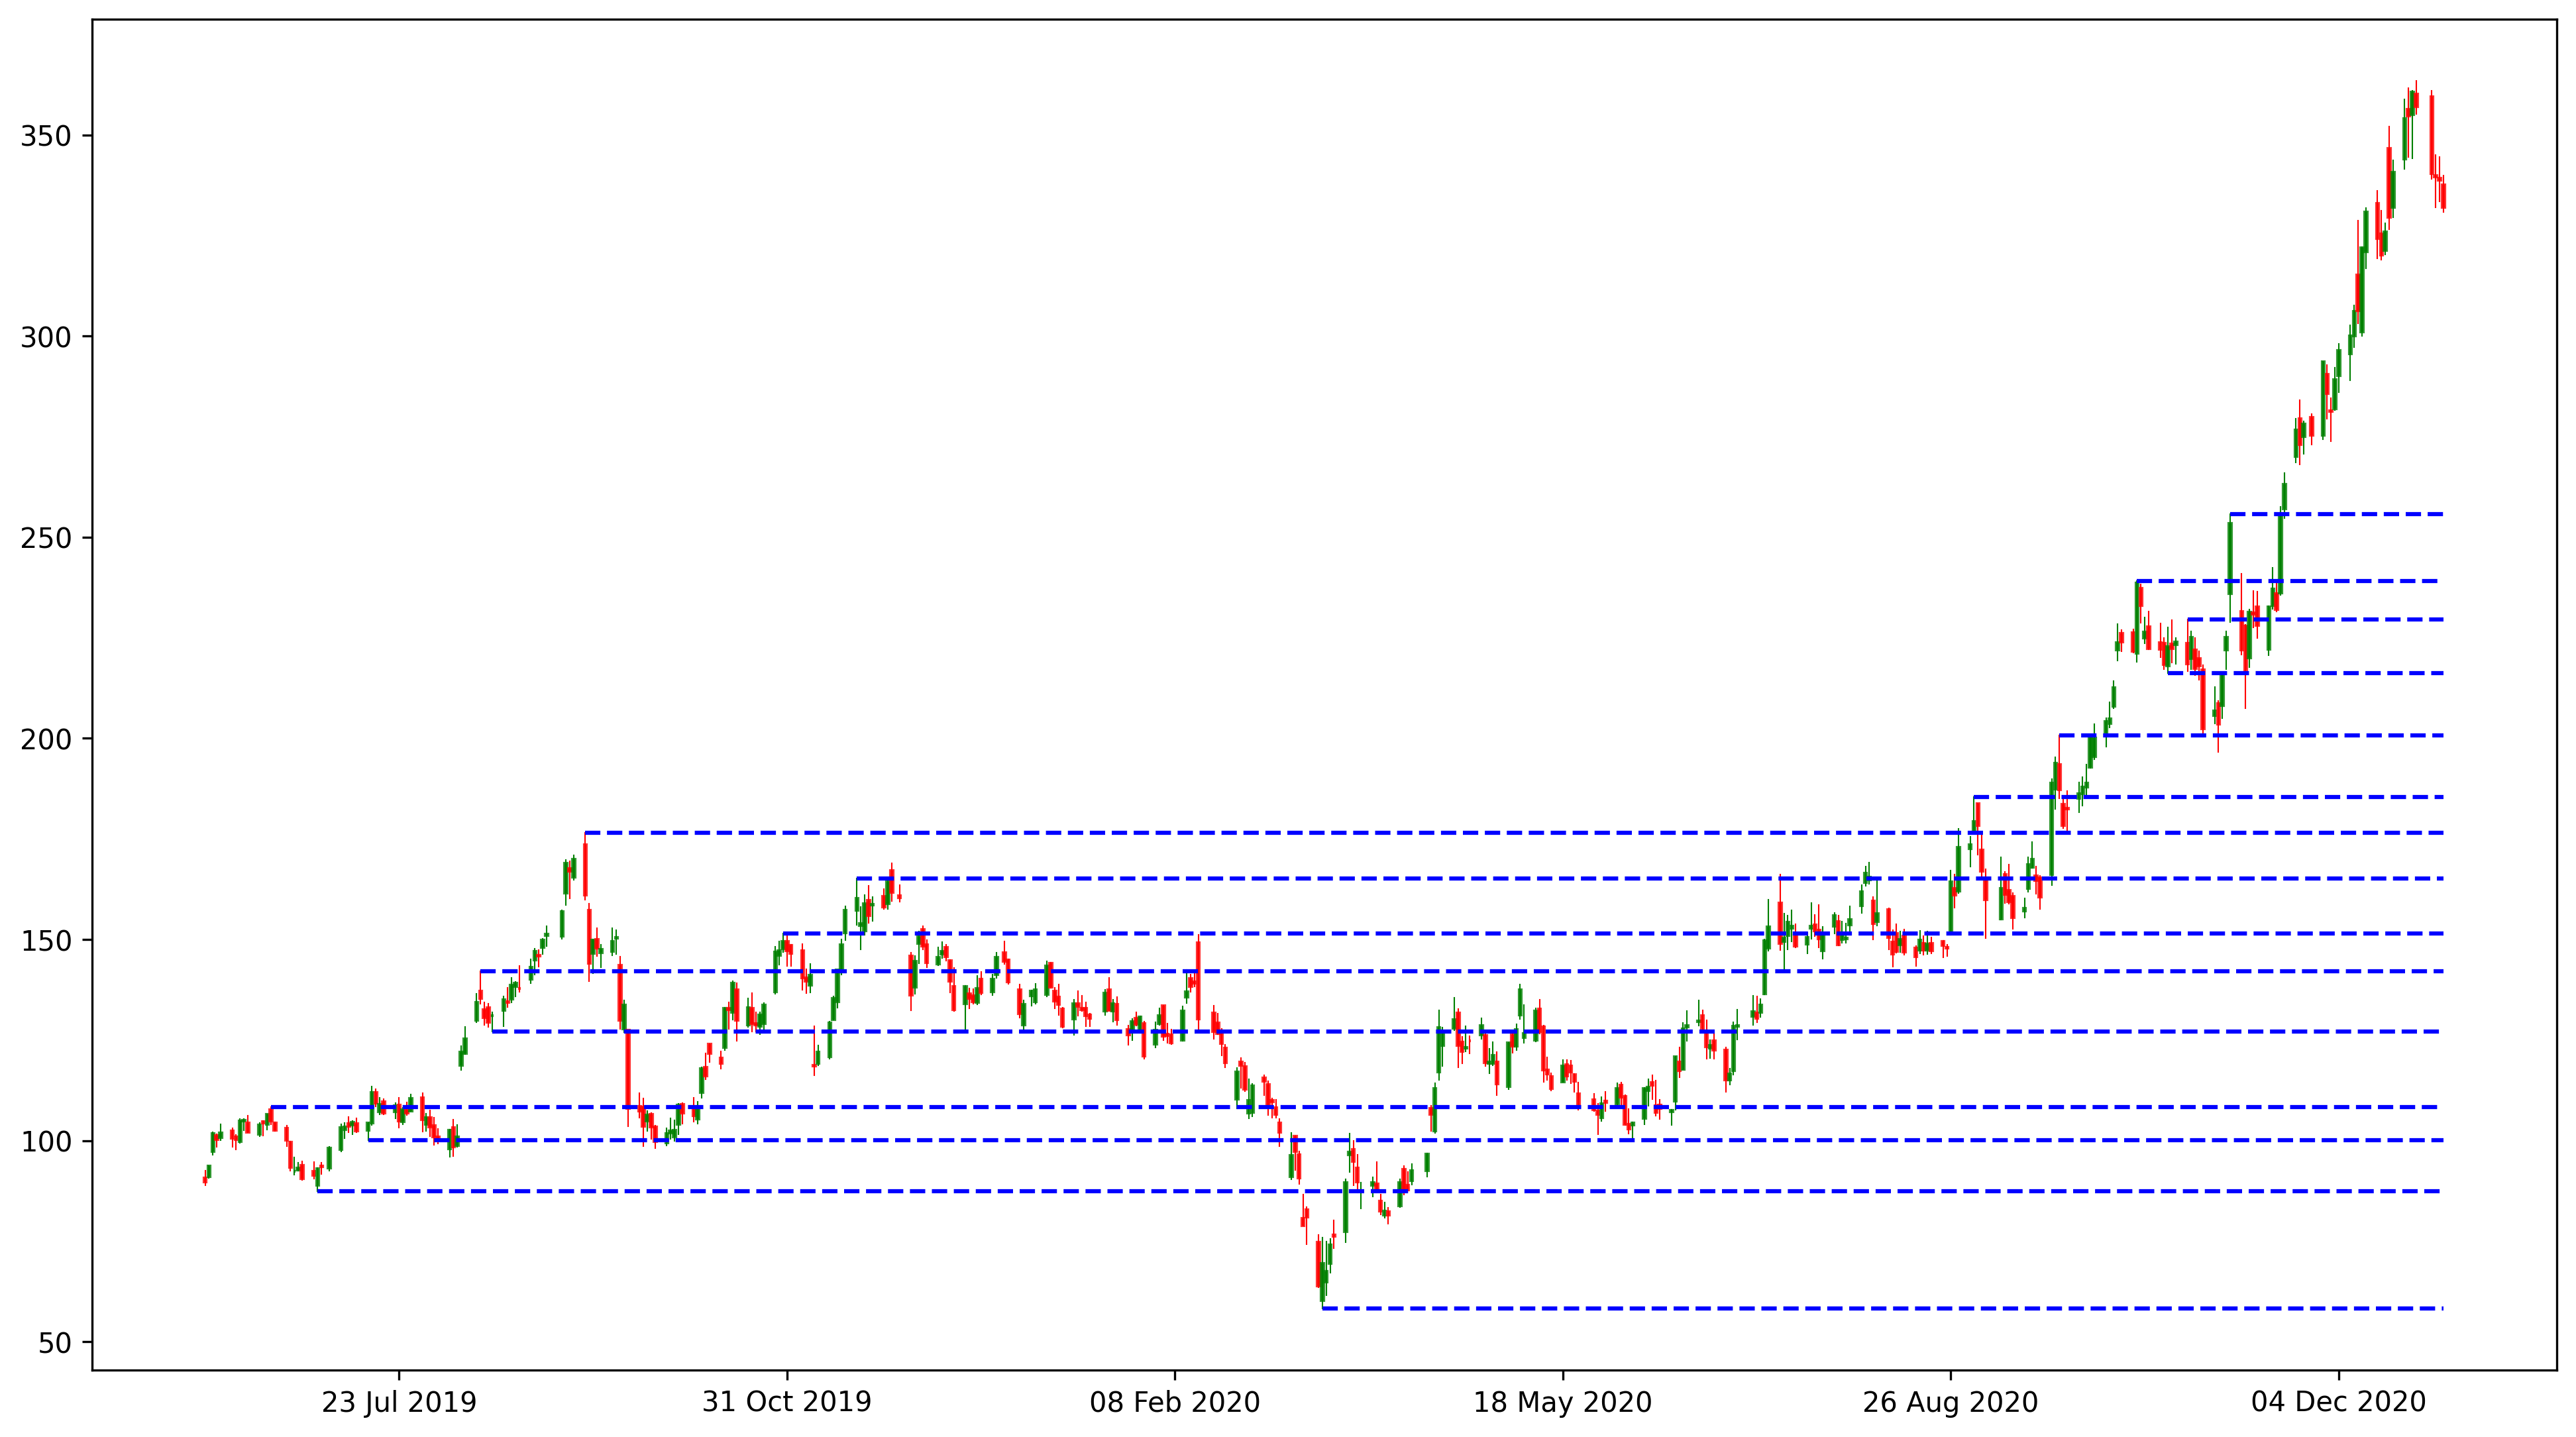

In [182]:
#method 2: window shifting method
symbol = 'ROKU'
df = get_stock_price(symbol)

pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
    high_range = df['High'][i-5:i+4]
    current_max = high_range.max()

    if current_max not in max_list:
        max_list = []
    max_list.append(current_max)
    if len(max_list) == 5 and is_far_from_level(current_max, pivots, df):
        pivots.append((high_range.idxmax(), current_max))
    
    low_range = df['Low'][i-5:i+5]
    current_min = low_range.min()
    if current_min not in min_list:
        min_list = []
    min_list.append(current_min)
    if len(min_list) == 5 and is_far_from_level(current_min, pivots, df):
        pivots.append((low_range.idxmin(), current_min))

plot_all(pivots, df)     

In [6]:
# screening
def has_breakout(levels, previous, last):
  for _, level in levels:
    cond1 = (previous['Open'] < level) # to make sure previous candle is below the level
    cond2 = (last['Open'] > level) and (last['Low'] > level)
  return (cond1 and cond2)

def detect_level_method_1(df):
  levels = []
  for i in range(2,df.shape[0]-2):
    if is_support(df,i):
      l = df['Low'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
    elif is_resistance(df,i):
      l = df['High'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
  return levels

def detect_level_method_2(df):
  levels = []
  max_list = []
  min_list = []
  for i in range(5, len(df)-5):
      high_range = df['High'][i-5:i+4]
      current_max = high_range.max()

      if current_max not in max_list:
          max_list = []
      max_list.append(current_max)
      if len(max_list) == 5 and is_far_from_level(current_max, levels, df):
          levels.append((high_range.idxmax(), current_max))
      
      low_range = df['Low'][i-5:i+5]
      current_min = low_range.min()
      if current_min not in min_list:
          min_list = []
      min_list.append(current_min)
      if len(min_list) == 5 and is_far_from_level(current_min, levels, df):
          levels.append((low_range.idxmin(), current_min))
  return levels

# lists to store the screened results
screened_list_1 = [] 
screened_list_2 = []

# get the full stock list of S&P 500 
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
stock_list = payload[0]['Symbol'].values.tolist()

for symbol in stock_list:
  try: 
    df = get_stock_price(symbol)
    
    levels_1 = detect_level_method_1(df)
    if (has_breakout(levels_1[-5:], df.iloc[-2], df.iloc[-1])):
      screened_list_1.append(symbol)

    levels_2 = detect_level_method_2(df)
    if (has_breakout(levels_2[-5:], df.iloc[-2], df.iloc[-1])):
      screened_list_2.append(symbol)

  except Exception as e:
    print(e)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

In [41]:
screened_list_1

['ADBE', 'COO', 'COST', 'FE']

In [42]:
screened_list_2

['ACN', 'BDX', 'COO', 'DRI', 'IT', 'INTU', 'MDT', 'CRM']